## SeaTurtleID2022 Dataset Exploration and Masks Visualisation

The SeaTurtleID2022 Dataset consists of 8729 images with labelled pixels for 3 different  classes inlcuding ``turtle``, ``flipper``, and ``head``. 

After you have downloaded the data and ``unzip`` it, you will find the following directories and files:

- ``images``: directory containing images
- ``annotations.json``: file having annotations
- ``metadata.csv``: file containing metadata having image id, width and height of the image, file_name, identity, and date
- ``metadata.csv``: file containing metadata along with data splits for training, validation, and test across different settings

The ``annotations.json`` file have annotations in the [Common Objects in Context (COCO)](https://cocodataset.org/#home) format. Microsoft released COCO dataset in 2015 and it has become a common benchmark dataset for various computer vision tasks such as classification, object detection, semantic segmentation, instance segmentation, and image captioning. Due to its popularity, many datasets were released in COCO JSON format. 

The [COCO API](https://pypi.org/project/pycocotools/) Python package assists in loading, parsing, and visualising the annotations in COCO format. You can install pycocotools by executing the following command in terminal. 

```python
pip install pycocotools
```

After you have successfully installed ``pycocotools`` package, you should be able to explore and visualise annotations as illustrated below. 

In [2]:
import os
import glob
import json
import pandas as pd 
from pycocotools.coco import COCO
from PIL import Image
import numpy as np 
import skimage.io as io
from matplotlib import pyplot as plt
from pprint import pprint
%matplotlib inline

In [5]:
base_dir = "../turtles-data/data"

## Loading and exploring data

In [6]:
with open(os.path.join(base_dir, 'annotations.json'), 'r', encoding='utf8') as file:
    data = json.load(file)

In [7]:
data.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [8]:
# Let's print out the first few image filenames/paths
for img in data['images'][:10]:
    print(img['file_name'])

images/t001/CAluWEgwPX.JPG
images/t001/EKyrFKHQzh.JPG
images/t001/ELAvEqeXxT.JPG
images/t001/IxRLFwTGCv.JPG
images/t001/LKCJAhfLBJ.JPG
images/t001/LZystXlIqe.JPG
images/t001/OiaMESWPyh.JPG
images/t001/VMyJozldvy.jpg
images/t001/XhbkFIOvZr.JPG
images/t001/ZKnMahXQgJ.JPG


In [9]:
# Let's see first annotation
for ann in data['annotations'][:1]:
    for key, value in ann.items():
        print(key)
        print(value)
        print("********")
    print("--------------------------------")
    

id
1
********
image_id
1
********
category_id
3
********
segmentation
{'counts': [858927, 7, 1322, 23, 1306, 34, 1298, 36, 1296, 39, 1292, 42, 1291, 43, 1289, 45, 1287, 47, 1285, 48, 1285, 49, 1283, 51, 1281, 53, 1280, 54, 1278, 56, 1277, 56, 1277, 57, 1275, 58, 1274, 60, 1273, 61, 1272, 61, 1272, 62, 1270, 63, 1269, 64, 1268, 65, 1268, 65, 1268, 66, 1267, 67, 1266, 67, 1265, 68, 1264, 69, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1262, 71, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1260, 73, 1260, 73, 1260, 73, 1259, 74, 1258, 75, 1258, 74, 1259, 73, 1260, 72, 1261, 71, 1262, 69, 1263, 69, 1264, 68, 1265, 66, 1266, 64, 1269, 63, 1269, 61, 1272, 59, 1274, 58, 1275, 55, 1278, 52, 1281, 15, 8, 25, 1285, 12, 16, 17, 1289, 9, 24, 3, 1297, 7, 1327, 4, 1715124], 'size': [1333, 2000]}
********
area
4065.0
********
bbox
[644.0, 441.0, 70.0, 78.0]
********
iscrowd
1
********
attributes
{'orientation': 'left', 'occluded': False}
********
-------------

##  Using COCO API (Recommended)

In [11]:
# initialise COCO API for annotations
coco = COCO(os.path.join(base_dir, 'annotations.json'))

loading annotations into memory...
Done (t=6.95s)
creating index...
index created!


## There are multiple data structures that define COCO:

- ``coco.anns``: dictionary of annotations
- ``coco.imgs``: dictionary of images
- ``coco.cats``: dictionary of categories
- ``coco.catToImgs``: dictionary that maps and informs which images have this category
- ``coco.imgToAnns``: dictionary that maps image_id to annotations

## Elements of COCO Annotation

- ``area``: size of an Annotation
- ``bbox``: a list of four floating point values representing the bounding box of object in image
- ``category_id``: an integer value indicating the category or class of the object
- ``image_id``: an integer value that is a unique identifier for the image in which the object appears. This ``image_id`` corresponds to the "id" in ``image`` component
- ``iscrowd``: a binary integer value indicating whether the object is part of a crowd(1) or not (0)
- ``segmentation``: array of 2D pixel coordinates (i.e. polygon) that defines segmentation mask

## Example of an COCO Annotation

In [12]:
for key in coco.anns.keys():
    pprint(coco.anns[key])
    break

{'area': 4065.0,
 'attributes': {'occluded': False, 'orientation': 'left'},
 'bbox': [644.0, 441.0, 70.0, 78.0],
 'category_id': 3,
 'id': 1,
 'image_id': 1,
 'iscrowd': 1,
 'segmentation': {'counts': [858927,
                             7,
                             1322,
                             23,
                             1306,
                             34,
                             1298,
                             36,
                             1296,
                             39,
                             1292,
                             42,
                             1291,
                             43,
                             1289,
                             45,
                             1287,
                             47,
                             1285,
                             48,
                             1285,
                             49,
                             1283,
                             51,
          

## Elements of COCO Category

We have three categories in this datset. 
- supercategory: parent class of the child class (i.e. giraffe is an Animal, supercategory: Animal)
- id: integer that corresponds to category
- name: English word that defines category

In [13]:
for i in range(1,4):
    print(coco.cats[i])

{'id': 1, 'name': 'turtle', 'supercategory': ''}
{'id': 2, 'name': 'flipper', 'supercategory': ''}
{'id': 3, 'name': 'head', 'supercategory': ''}


In [14]:
# you can also get all categories using coco.getCatIds
coco.getCatIds()

[1, 2, 3]

In [15]:
# get metadata of coco categories
coco.loadCats(coco.getCatIds()) # returns dictionary

[{'id': 1, 'name': 'turtle', 'supercategory': ''},
 {'id': 2, 'name': 'flipper', 'supercategory': ''},
 {'id': 3, 'name': 'head', 'supercategory': ''}]

## Elements in COCO Image

Important ones for this dataset are:
- file_name: path of the image
- height: an integer value representing height of the image in pixels
- width: an integer value representing width of the image in pixels
- id: a unique identifier for the image

In [16]:
for key in coco.imgs.keys():
    pprint(coco.imgs[key])
    break

{'coco_url': '',
 'date_captured': 0,
 'file_name': 'images/t001/CAluWEgwPX.JPG',
 'flickr_url': '',
 'height': 1333,
 'id': 1,
 'identity': 't001',
 'license': 0,
 'timestamp': '2014:07:14 14:49:45',
 'width': 2000}


## Important functions

We can use the following functions to get particular data item:
- ``loadAnns``: load anns with the specified ids
- ``loadCats``: load cats with the specified ids
- ``loadImgs``: load imgs with the specified ids

In [26]:
im = coco.loadImgs(6310)[0]
pprint(im)

{'coco_url': '',
 'date_captured': 0,
 'file_name': 'images/t335/XoYhGNNwre.JPG',
 'flickr_url': '',
 'height': 1333,
 'id': 6310,
 'identity': 't335',
 'license': 0,
 'timestamp': '2017:07:17 18:16:11',
 'width': 2000}


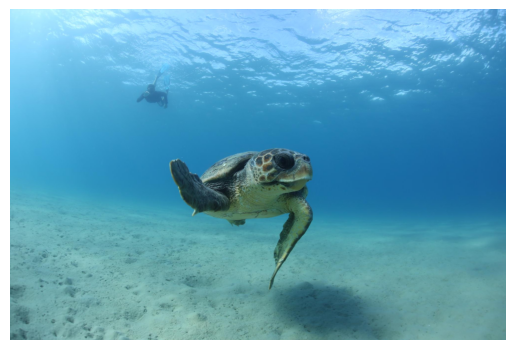

In [27]:
I = io.imread(os.path.join(base_dir, im['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

## Visualizing data and annotations

In [21]:
img_dir = os.path.join(base_dir, 'images/')
image_id = 6310
img = coco.imgs[image_id]
img

{'id': 5009,
 'width': 2000,
 'height': 1333,
 'file_name': 'images/t259/qAOHzJMowi.JPG',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0,
 'timestamp': '2016:06:26 16:56:14',
 'identity': 't259'}

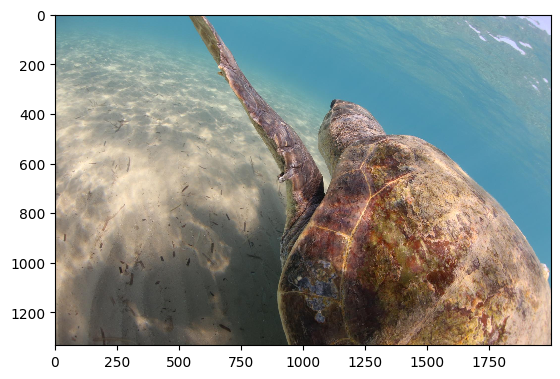

In [23]:
# Let's display the image
image = np.array(Image.open(os.path.join(base_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

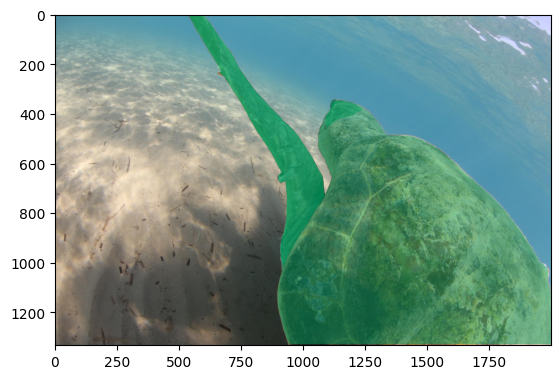

In [24]:
# Let's overlay annotations
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

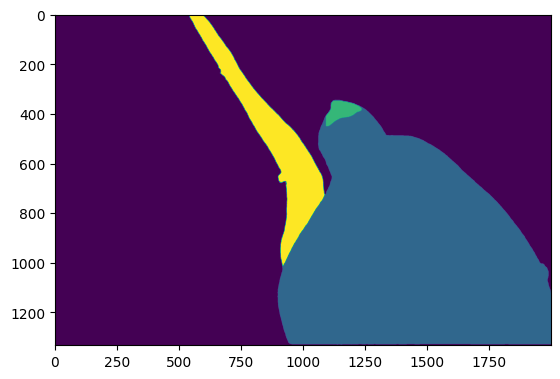

In [25]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask)

## Let's see one more example

In [53]:
image_id = 77
img = coco.imgs[image_id]
img

{'id': 77,
 'width': 2000,
 'height': 1124,
 'file_name': 'images/t004/MzIRwubLJv.jpg',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0,
 'timestamp': '2010:07:10',
 'identity': 't004'}

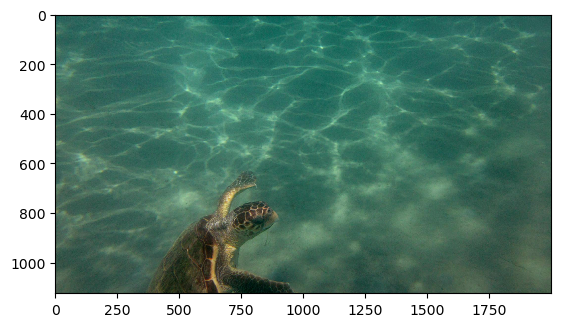

In [55]:
# Let's display the image
image = np.array(Image.open(img['file_name']))
plt.imshow(image, interpolation='nearest')
plt.show()

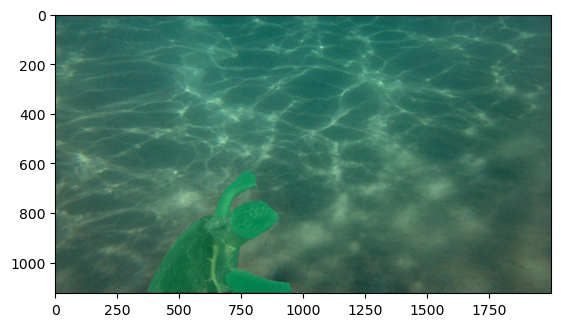

In [57]:
# Let's overlay annotations
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

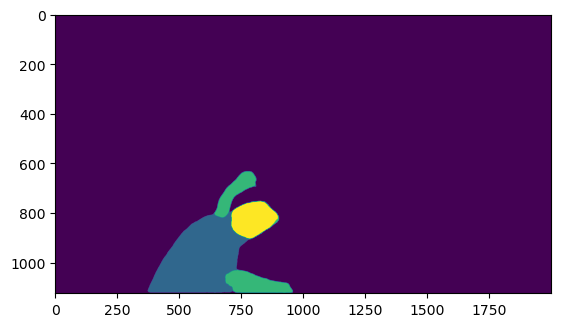

In [58]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask)